### Constrained optimization: linear programming
Luca Magri (lm547@cam.ac.uk)

(With many thanks to Professor Gábor Csányi.)

##  List of contents


1. Linear programming
1. Fundamental theorem
1. Graphical solution
1. Solution by hand
1. Solution with simplex algorithm
1. Solution with the tableau
1. Slack variables 
1. Phase 1

## Linear Programming (LP)

Linear programming is an optimization problem in which _both_ the objective _and_ constraints are linear. 

- Efficient algorithm exists to find exact solution (Simplex method) 
- Large problems can be solved with computers
- Strong connection to linear algebra
- Historical importance (George Dantzig, 1946-47, US Army logistics and planning)
 - Start of numerical optimization as a formal field
 - The notion of _program_ originally referred to military schedules
- Includes _network optimization_ (e.g. optimal transport) as a subclass, although specialised algorithms for this allow larger problems to be solved than general LP

## Standard form of a linear program

Minimize

$$f(x) = c^T x, \qquad x = (x_1,\ldots x_n)^T$$

subject to $m$ equality constraints

$$ Ax = b, \qquad A\;\;\text{ is an }\;\;m\times n\;\;\text{ matrix}$$

and bounds $$x_i \ge 0, \qquad i=1,\ldots, n$$

- In this lecture, $\textrm{rank}(A)=m<n$  

In [3]:
from pylab import *
import numpy as np

## Graphical solution with an example

Minimize $$ f(x) = x_1  + 2 x_2 $$

subject to $$ x_1+x_2 = 2$$

and $$x_i \ge 0$$

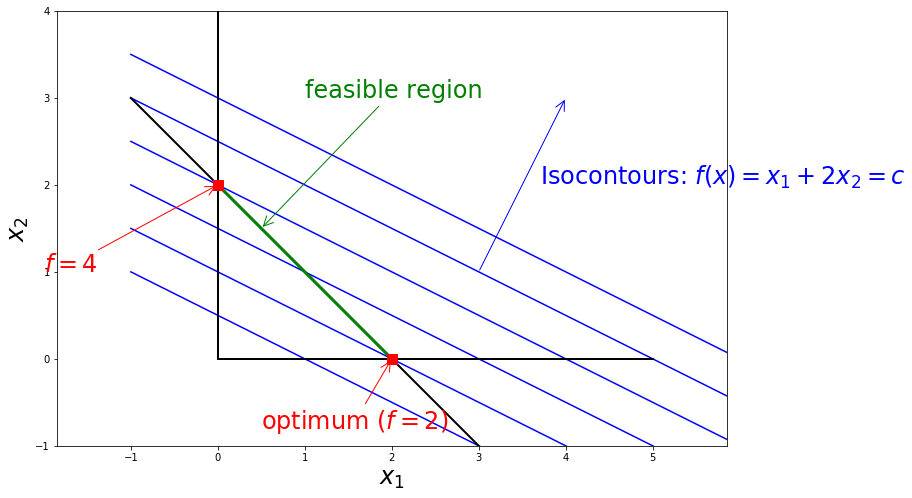

In [4]:
figure(figsize=(12,8))
x1 = np.array([-1, 6])
for fx in [1, 2, 3, 4, 5, 6]:
    plot(x1, (fx-x1)/2.0, "b-")
plot(x1, 2-x1, "k", linewidth=2)
plot([0,5], [0,0], "k", linewidth=2)
plot([0,0], [0,4], "k", linewidth=2)
plot([0,2], [2,0], "g", linewidth=3)
plot(2, 0, color='red', marker='s', linestyle='dashed',linewidth=2, markersize=10)
plot(0, 2, color='red', marker='s', linestyle='dashed',linewidth=2, markersize=10)
annotate(s='feasible region', xy=(0.5,1.5), xytext=(1,3), arrowprops=dict(arrowstyle='->',color="g"), color="g", fontsize=24)
annotate(s='optimum ($f=2$)', xy=(2,0), xytext=(0.5,-0.8), arrowprops=dict(arrowstyle='->',color="r"), color="r", fontsize=24)
annotate(s='$f=4$', xy=(0,2), xytext=(-2,1), arrowprops=dict(arrowstyle='->',color="r"), color="r", fontsize=24)
annotate(s='', xy=(4,3), xytext=(3,1), arrowprops=dict(arrowstyle='->',color="b"), fontsize=24)
text(3.7, 2, "Isocontours: $f(x) = x_1  + 2 x_2=c $", fontsize=24, color="b")
xlabel("$x_1$", fontsize=24); ylabel("$x_2$", fontsize=24)
axis('tight')
axis('equal')
axis([-1,5,-1,4])
show()

- The equality constraint and the bounds define the feasible region.
- The linear objective function defines a series of parallel lines as the contours of constant $f$ (also known as isocontours)
- The minimum value of $f$ is the first isocontour to intersect the feasible region as $f$ increases.


In general, in the multi-dimensional case it is best to use linear algebra instead of graphical solutions:

- The $m$ constraints $Ax = b$ define a _subspace_ of $\mathbb{R}^n$. 
 - Typically $m < n$, otherwise the  feasible set is either empty or consists of only the point $A^{-1} b$
- The bounds $x_i \ge 0$ cut out a portion of this subspace
  - This defines the __feasible region__, which is geometrically a convex polyhedron
- The feasible region has a number of corners
 - These are called __extremal points__, which are called __basic__ solutions
 - $n-m$ control variables are zero at these points. These are called __free__ variables
- The isocontours of $f$ are a series of parallel planes (of dimensionality $n-1$). 
 - As $f$ increases, the first isocontour to intersect the feasible region will do so at one of the extremal points
  - This corresponds to the minimum. 
- In this lecture, we assume that the problem is non-degenerate, therefore there are $m$ non-zero basic variables
 - If the problem is degenerate, cycling may occur. There exist perturbation methods to avoid this, but we will not study them here.

- Finding the minimum is equivalent to finding the $m$ control variables that 
  - satisfy $Ax=b$ with positive solutions
  - give the lowest value of $f$.
 <- Solving a linear system of $m$ equations to satisfy $Ax=b$ is not the hard part>
 <- The hard part is finding the right set of control variables>
<- All of this is interesting in the case of large $m$ and $n$>

## Fundamental theorem of linear programming (only enunciation)

Given a linear program in the standard form where A is an $m\times n$ matrix of rank $m$ 
- If there is  a feasible solution, there is a _basic_ feasible solution
 - Geometrically, a basic feasible solution is a vertex
- If there is an optimal feasible solution, there  is an optimal _basic_ feasible solution

(Optional, see the proof: Sections 2.4, 2.5. of Luenberger, Ye, Linear and Nonlinear Programming)

Implications:
- We can solve a linear  program by inspecting basic feasible solutions until we find the optimum
 <- There are $\frac{n!}{m!(n-m)!}$ possible vertices->
- This is what the simplex method does systematically

## An example of linear programming with three variables (optimal allocation)


- Elena is a decision-making university administrator, who faces an unexpected budget deficit
  (The story, all names, characters, and incidents portrayed are fictitious!)
- She decides to open new fee-paying places on existing and new graduate courses. 
- To do so, she needs to hire teaching staff of three different types

 - lecturers, readers and professors
 <- who can all teach laboratories and give lectures. >
- 80 hours of labs and 40 hours of lectures must be convered every week

- The weekly rates and the corresponding teaching hours are:

| Temp staff | Weekly rate | Labs (hours) | Lectures (hours) |
|---|
|Lecturer | 400 | 7 | 3 |
|Reader | 680 | 5 | 5 |
| Professor | 800 | 3 | 7 |

- In order to minimise the costs, how many lecturers, readers and professors will Elena hire?
(Elena took 3M1, therefore she will make the optimal choice.)

1. We formalize the problem.
 - $x_1$ = number of lecturers
 - $x_2$ = number of readers
 - $x_3$ = number of professors
 - $x = (x_1,x_2,x_3)^T$. 

- The teaching hours to be delivered define the equality constraints
\begin{array}
~7 x_1 + 5 x_2 + 3 x_3 &= 80\\
3 x_1 + 5 x_2 + 7 x_3 &= 40\\
\end{array}
- The objective function to be minimized is the payroll cost
\begin{align}
f(x) &= c^Tx \\
& = \begin{bmatrix}400 & 680 & 800\end{bmatrix} \begin{bmatrix} x_1\\x_2\\x_3\end{bmatrix}
\end{align}

## Solution by hand


- The optimum must be an extremal point
- There are $m=2$ equality constraints, therefore $n-m=3-2=1$ control variable must be zero at an extremal point
- There are three possible cases


1. Case $x_1 = 0$  
\begin{array}
~&5 x_2 + 3 x_3 &= 80\\
&5 x_2 + 7 x_3 &= 40\\
\Rightarrow&\hfil 4 x_3 &= -40\\
&&\therefore \text{infeasible}
\end{array}

2. Case $x_2 = 0$ 
\begin{array}
~&7 x_1 + 3 x_3 &= 80\\
&3 x_1 + 7 x_3 &= 40\\
\Rightarrow&\hfil 40 x_3 &= 40\\
&\hfil  x_3 &= 1\\
&\hfil x_1 &= 11\\
&\hfil f(x) &= 5200
\end{array}

 3. Case $x_3 = 0$ 
\begin{array}
~&7 x_1 + 5 x_2 &= 80\\
&3 x_1 + 5 x_2 &= 40\\
\Rightarrow&\hfil 4 x_1 &= 40\\
&\hfil  x_1 &= 10\\
&\hfil x_2 &= 2\\
&\hfil f(x) &= 5360
\end{array}

- Case 2 is the minimum 
 - To minimize the payroll cost Elena should hire 11 lecturers,  0 readers and 1 professor. 

## The simplex algorithm
- Larger linear programs cannot be easily solved by hand. 
- The simplex algorithm provides a procedure for solving linear programs.


1. **Phase 1. Start the algorithm**
 - Start with an extremal feasible solution, which is a vertex of the feasible region with $m$ nonzero control variables
   (We will see how to do this after learning how to do Phase 2)
 
 

1. **Phase 2. Move from one vertex to another until the minimum is found**
 - Move along an edge of the feasible region to another vertex where $f$ is smaller
 - Continue until you find a vertex where every edge leading away would increase $f$
 - This is the minimum

## Solution with the simplex algorithm

- To complicate the previous problem, Elena can hire _postgraduate students_ (variable $x_0$) as well

| Temp staff | Weekly rate | Labs (hours) | Lectures (hours) | 
|---|
|Postdocs | 200 | 3 | 0 |
|Lecturer | 400 | 7 | 3 |
|Reader | 680 | 5 | 5 |
| Professor | 800 | 3 | 7 |

### Step 0: Formalize the optimization problem
- The problem now has an additional variable $x_0$


\begin{array}
\text{minimize}&c^Tx = 200x_0 + 400x_1+680x_2+800x_3\\
\text{subject to}& Ax=b\\
&=\begin{bmatrix}
3 & 7&5&3\\0 & 3&5&7\\
\end{bmatrix} \begin{bmatrix} x_0\\x_1\\x_2\\x_3 \end{bmatrix} = \begin{bmatrix}80\\40\end{bmatrix}\\
\text{and}&x_i\ge0
\end{array}

- The first and second rows of $Ax=b$ will be denoted $\boxed{1}$ and $\boxed{2}$, respectively 

### Step 1: Start from a basic solution (= vertex)
- A starting vertex is a __particular solution__ of $Ax=b$
- In this case, we start with $$x = \begin{bmatrix} 0\\ 10\\2\\0 \end{bmatrix}$$ (we shall see in Phase 1 how to calculate this)
- $x_1$ and $x_2$ are the __basic variables__ corresponding to this solution 
- The remaining variables, which are zero, are the __free variables__ ($x_0$ and $x_3$ in this case)
- The objective function at this point is 
\begin{align} c^T x & = 0x_0 + 400\cdot 10+680\cdot 2+0x_3 \\ 
&=5360\end{align}

- It is convenient to rearrange the constraint equations so that the coefficients of the basic variables form the identity matrix 
- By _Gaussian elimination_

\begin{align}
\begin{matrix}
\frac{1}{4}\left(\boxed{1} - \boxed{2}\right) & \rightarrow\\
\frac{1}{20}\left(7\times\boxed{2} - 3\times\boxed{1}\right) &\rightarrow
\end{matrix}
\;\;\;
\begin{bmatrix}
\frac 3 4 & \bf{1} & \bf{0} & -1 \\
-\frac 9 {20}&\bf{0} & \bf{1} & 2 \\
\end{bmatrix} 
\begin{bmatrix}
0\\ x_1
\\x_2\\ 0
\end{bmatrix}=
\begin{bmatrix}
10\\2
\end{bmatrix}
\end{align}

Notice that the right hand side contains the vertex coordinates.

### Step 2: Identify the edge to follow
To move away from this vertex, one of the free variables, $x_0$ or $x_3$, has to increase away from zero. 
- Let's try increasing $x_0$ while leaving $x_3$ zero.

  - The constraint equations for $x_0\neq 0$ and $x_3=0$ are

\begin{array}
~x_1 &= 10-0.75 x_0\\
x_2 &= 2+0.45 x_0
\end{array}

 - Substituting this into the objective function provides

\begin{align}
c^Tx & = 200x_0 + 400\cdot\underbrace{(10-0.75 x_0)}_{x_1} + 680\cdot\underbrace{(2+0.45 x_0)}_{x_2}  \\
&= 5360 +206x_0
\end{align}

 - The coefficient of $x_0$ is the __reduced cost__
 - If we increase $x_0$, the objective function would increase because the reduced cost is positive

- Now, let's try increasing $x_3$ while keeping $x_0$ zero
   - The constraint equations for $x_0\neq 0$ and $x_3=0$ tell us what the basic variables do
  

\begin{array}
~x_1 &= 10+ x_3\\
x_2 &= 2-2x_3
\end{array}

  - Substituting this into the objective function $c^Tx$ provides

$$
400\cdot\underbrace{(10+x_3)}_{x_1}+680\cdot\underbrace{(2-2x_3)}_{x_2}+800x_3 = 5360-160x_3
$$

 - The coefficient (reduced cost) of $x_3$ is $-160$
 - Thus, increasing $x_3$ away from zero would decrease the objective function
 - We follow this edge
 - When we have a choice as to which variable to change, calculate all the reduced costs, and pick the most negative one.

### Step 3: Calculate the next vertex

The next question is how much to increase $x_3$ by? 

 - We follow this edge until we reach the next vertex, where one of the basic variables (here $x_1$ or $x_2$) becomes zero. 

 - As $x_3$ increases, $x_1$ increases, but $x_2$ decreases
   - Therefore, $x_2$  will reach zero, when $x_3 = 1$ (and thus $x_1=11$). 
  - So the next vertex we reach is $x = (0, 11, 0, 1)^T$, for which $c^Tx = 5200$. 

- The basic variables are now $x_1$ and $x_3$. 
  - $x_3$ has become a new basic variable, so it is the __entering variable__
  - $x_2$ is no longer a basic variable, so it is the __leaving variable__.

### Repeat step 2 for the new vertex

- The reduced costs need to be calculated
- Express the constraint equations into __canonical form__, so that the coefficients of the basic variables form the identity matrix
\begin{align}
\begin{matrix}
\frac{1}{40}\left(7\times\boxed{1} - 3\times\boxed{2}\right) & \rightarrow\\
\frac{1}{40}\left(7\times\boxed{2} - 3\times\boxed{1}\right) &\rightarrow
\end{matrix}
\;\;\;
\begin{bmatrix}
0.525 & \bf{1} & 0.5 & \bf{0} \\
-0.225&\bf{0} & 0.5 & \bf{1} \\
\end{bmatrix} \begin{bmatrix} 0\\ x_1\\ 0\\ x_3\end{bmatrix} =
\begin{bmatrix}
11\\1
\end{bmatrix}
\end{align}

- Note that we  have just eliminated $x_2$ as a basic variable
  - Therefore, its reduced cost must be positive. We shall not follow it because we would increase the objective function
- Now, we need to check if increasing  $x_0$ increases or decreases the cost function

- The constraint equations tell us that

   \begin{array}
   ~x_1 &= 11-0.525x_0\\
   x_3 &=1+0.225 x_0
   \end{array}
 
    The objective function is

$$200x_0 + 400\cdot\underbrace{(11-0.525x_0)}_{x_1} + 800\cdot\underbrace{(1+0.225x_0)}_{x_3}  = 5200+170x_0
$$

 - So the reduced cost of $x_0$ is positive.
 - Therefore, the objective function increases along all edges away from this vertex
 - We have reached the minimum
  - To minimize the payroll cost Elena should hire 11 lecturers,  0 readers and 1 professor as before

## Solution with the Tableau

- All of the previous calculations can be conveniently and systematically performed by using the tableau

### Step 0: Formalize the optimization problem with the Tableau
1. We collect the constraint equations and the objective function coefficients into a single __tableau__, which is an $(m+1)\times(n+1)$ matrix

    $$
    \begin{bmatrix}
    A & b\\
        c^T & 0
    \end{bmatrix}
    =
    \begin{bmatrix}
    3 & 7 & 5 & 3 & 80\\
    0 & 3&5&7&40\\
    200&400&680&800 & 0
    \end{bmatrix}
    $$

- The first $n$ columns of the tableau correspond to the variables
- The first $m$ rows correspond to the constraints
- The last row is the cost function

### Step 1: Start from a basic solution (= vertex)

- Our initial vertex had $x_1$ and $x_2$ as basic variables, so we perform Gaussian elimination to transform the tableau into canonical form

$$
\begin{bmatrix}
0.75 & \bf{1} & \bf{0} & -1 & 10\\
-0.45 & 0&1&2&2\\
200&400&680&800 & 0
\end{bmatrix}
$$

- We eliminate the coefficients of the basic variables in the last line (this is equivalent to expressing the cost function as a function of the free variables only)

$$
\begin{bmatrix}
0.75 & 1 & 0 & -1 & 10\\
-0.45 & 0&1&2&2\\
206& 0& 0&-160 & \bf{-5360}
\end{bmatrix}
$$
- We obtain the _negative_ value of the objective function at the bottom right

- We also obtained the reduced costs on the bottom line 

### Step 2: Identify the edge to follow

- Because the reduced cost is negative, we pick $x_3$ as the entering variable 
- $x_0$ remains a free variable
- But which is the leaving variable? We can  use the tableu entries to decide. 
- The rates of increase/decrease of the basic variables is given by the coefficients in the corresponding row of the entering variable column:

$$
\begin{bmatrix}
0.75 & 1 & 0 & \bf{-1} & 10\\
-0.45 & 0&1&\bf{2}&2\\
206& 0& 0&-160 & -5360
\end{bmatrix}
$$

- As $x_3$ changes
\begin{array}
~x_1=0 &\text{ when }& x_3 = \frac{10}{-1} &= -10\\
x_2 =0 &\text{ when }& x_3 = \frac 2 2 &= 1
\end{array}

- Variables cannot be negative
- The variable that is closer to zero is chosen to be the leaving variable 
  - It is the variable with the lowest nonegative ratio. In this case, $x_2$.
  (If all ratios are negative, it can be shown that the problem is unbounded. Hence, $f\rightarrow-\infty$)
 

### Step 3: Calculate the next vertex

- Transform the tableau into canonical form by using Gaussian elimination with $x_1$ and $x_3$ as the basic variables

$$
\begin{bmatrix}
0.525 & 1 & 0.5 & 0 & 11\\
-0.225 & 0&0.5& 1 &1\\
\bf{170}& 0& \bf{80}&0 & \bf{-5200}
\end{bmatrix}
$$

-  All reduced costs are positive
- Therefore, we are at the optimum solution $x_0=0$, $x_1=11$, $x_2=0$, $x_3=1$.
- The negative of the cost function is the number at the bottom right.

## Slack variables to tackle inequality constraints 

The tableau contains __equality constraints__ and zero bounds, this is called __standard form__ of an LP problem. 

If there are __inequality constraints__ of the form

$$a_j^T x \ge b_j$$

We can convert them into an equality constraints by introducing a new __slack variable__, $s_j$,

$$ s_j = a_j^T x - b_j $$

with the constraint $s_j \ge 0$, this is equivalent to the original constraint, but now it is back in standard form. 

## Simplex method Phase 1

To start the Simplex Algorithm, we need an initial feasible solution, i.e. $m$ basic variables that satisfy the constraints. 

How do we find an initial feasible solution, _if there is not an obvious one_ ?

The answer is elegant:

- Construct an _auxiliary_ optimization problem, with the objective function being the "error" that measures by how much the constraints are violated
- The optimal solution of this problem is that with zero error, which provides the feasible solution. 



- Create $m$ slack variables, add one to each of the constraint equations
- The new objective function is the sum of the slack variables
- The initial feasible solution has the slack variables ($s_i$) as basic, and the actual variables of the problem ($x_i$) as zero

## Example of Phase 1

- In the previous example, introduce $s_1$ and $s_2$ as slack variables
- The constraints of this auxiliary problem are

\begin{array}
~7 x_1 + 5 x_2 + 3 x_3 +s_1 + 0&= 80\\
3 x_1 + 5 x_2 + 7 x_3 +0+s_2 &= 40\\
\end{array}

 - The auxiliary objective function is $$\begin{bmatrix} 0& 1\end{bmatrix}\begin{bmatrix}x\\ s\end{bmatrix} = s_1+s_2$$ So the auxiliary tableu is

\begin{bmatrix}
3 & 7 & 5 & 3 & \bf{1} & \bf{0} & 80\\
0 & 3&5&7&\bf{0} & \bf{1} & 40\\
0&0&0&0 & 1 &1 & 0
\end{bmatrix}

Solve this using the Simplex Algorithm
- if $s_1=s_2=0$, the actual variables are a feasible solution of the original problem.
- If $s_1>0$ and $s_2>0$, there is no feasible solution to the original problem



Eliminating the coefficients of the basic variables on the last line:

\begin{bmatrix}
3 & 7 & 5 & 3 & \bf{1} & \bf{0} & 80\\
0 & 3&5&7&\bf{0} & \bf{1} & 40\\
-3&-10&-10&-10 &0 &0 & -120
\end{bmatrix}

the reduced costs of $x_1,x_2,x_3$ are all the same, so we pick one, e.g. $x_1$ to be the entering variable.

Looking at the ratios of the second and last columns, $80\div 7 < 40\div 3$, so $s_1$ is the leaving variable. 

Continue with the Tableau as before. 

## Online tool

Check your solutions and tableaus here:

https://www.zweigmedia.com/simplex/simplex.php?lang=en